In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
374,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
722,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
print(data.corr()["target"].abs().sort_values(ascending=False))
#This shows the columns that are correlated with target

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


## EDA

In [10]:
y = data["target"]

1    526
0    499
Name: target, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


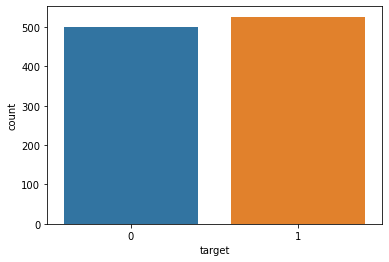

In [11]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

In [12]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [13]:
data["sex"].unique()

array([1, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

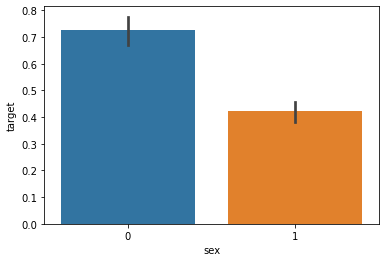

In [14]:
sns.barplot(data["sex"],data["target"])

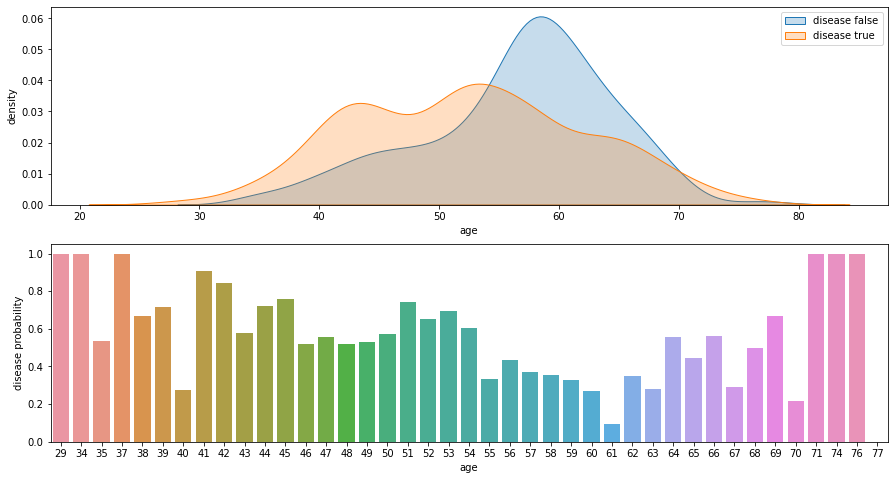

<Figure size 216x216 with 0 Axes>

In [15]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    axes[0].legend(legend_labels)  # Add legend manually
    axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

In [16]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [17]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [18]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [19]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

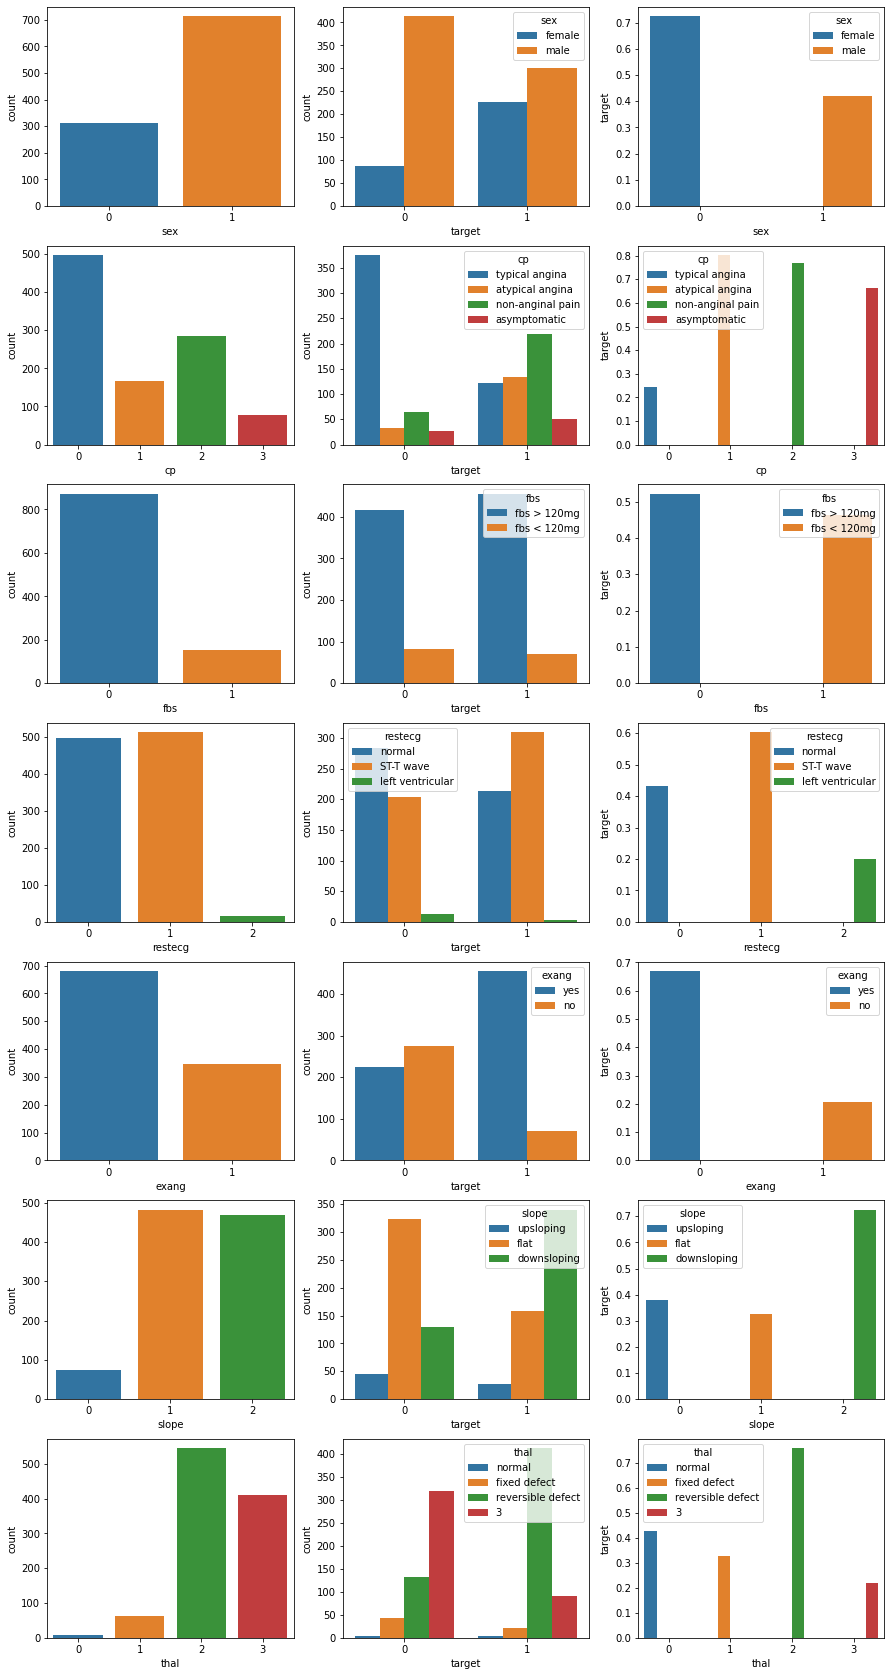

In [20]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [21]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [22]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

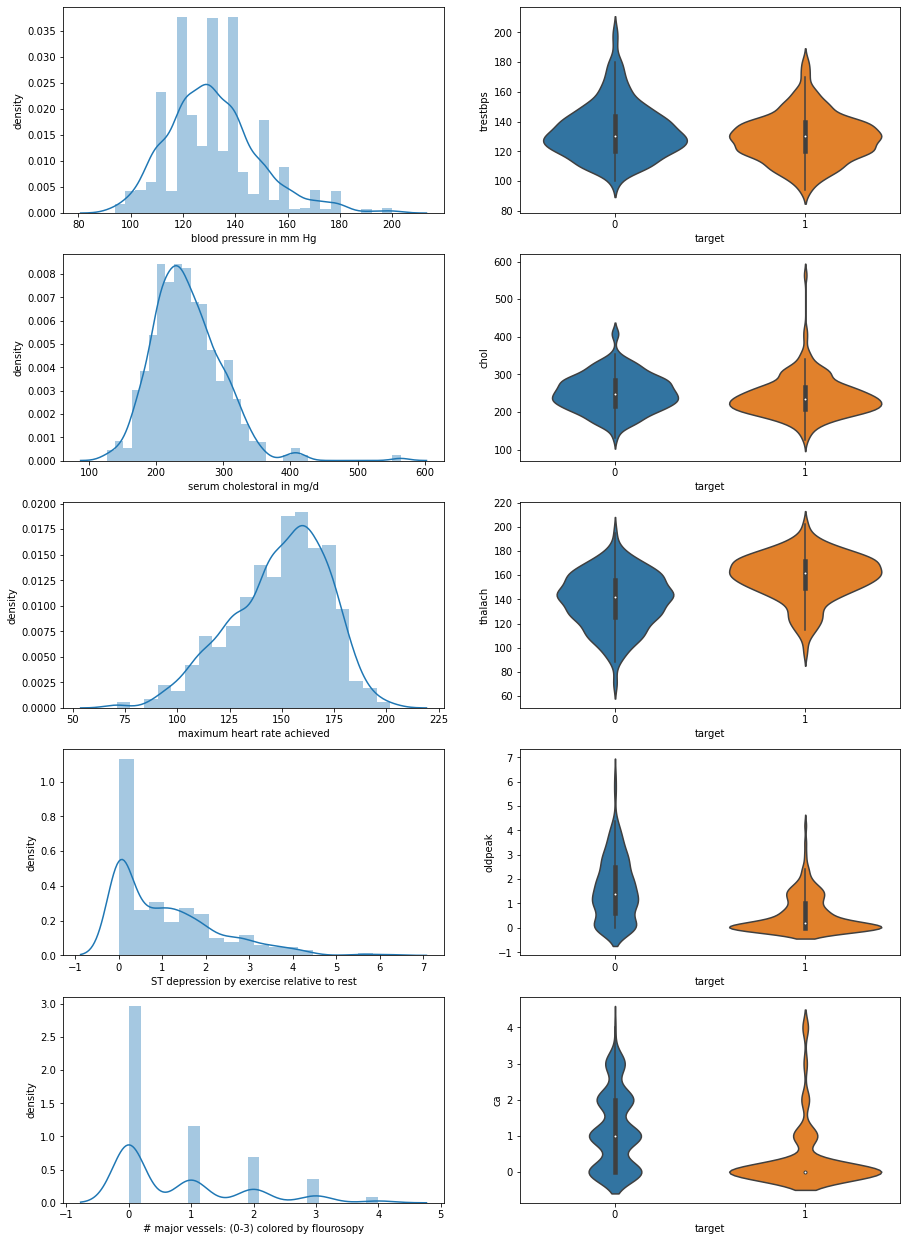

In [23]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

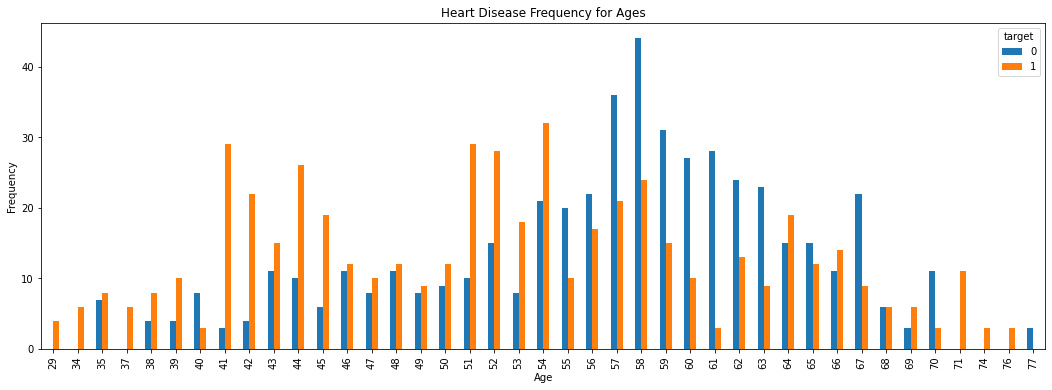

In [24]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

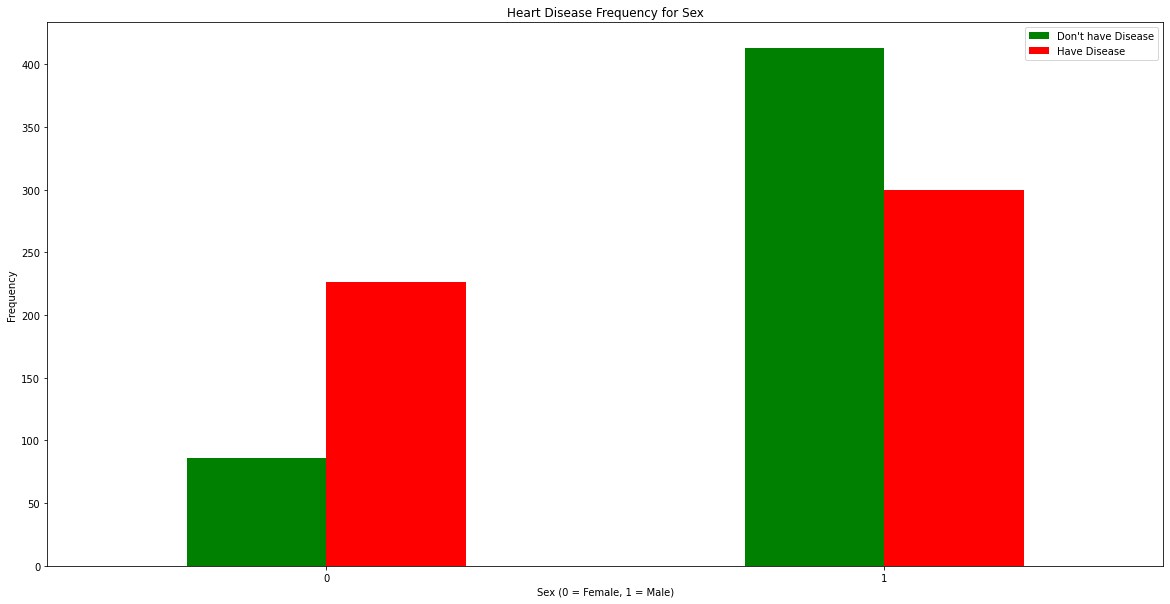

In [25]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['green','red' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [26]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [27]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


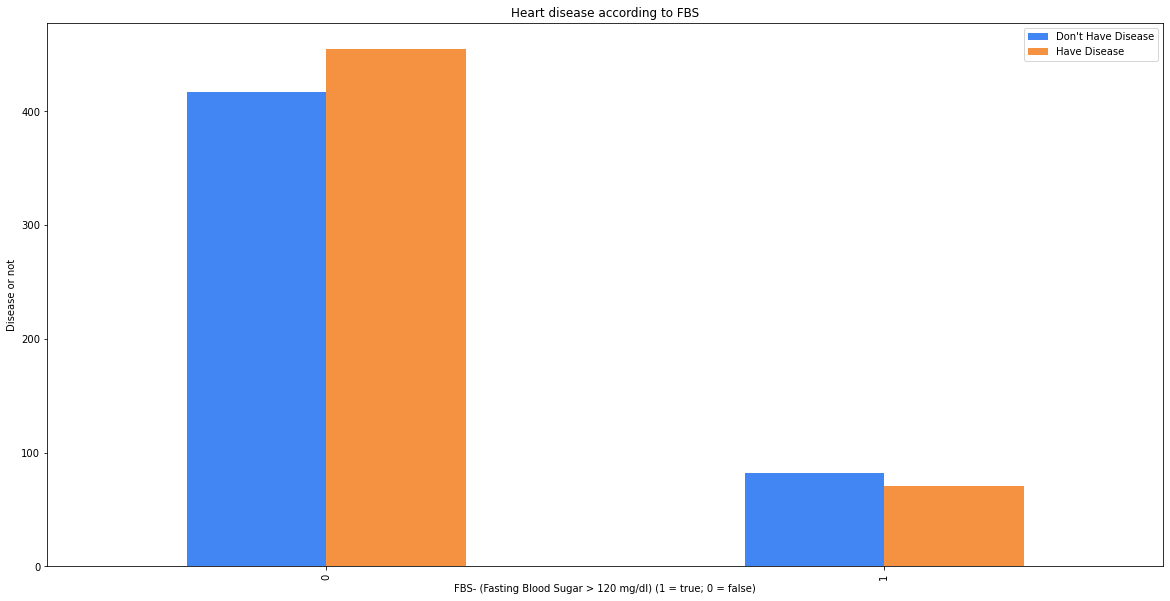

In [28]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [29]:
data["chest_pain_type"].unique()

array([0, 1, 2, 3], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest_pain_type', ylabel='target'>

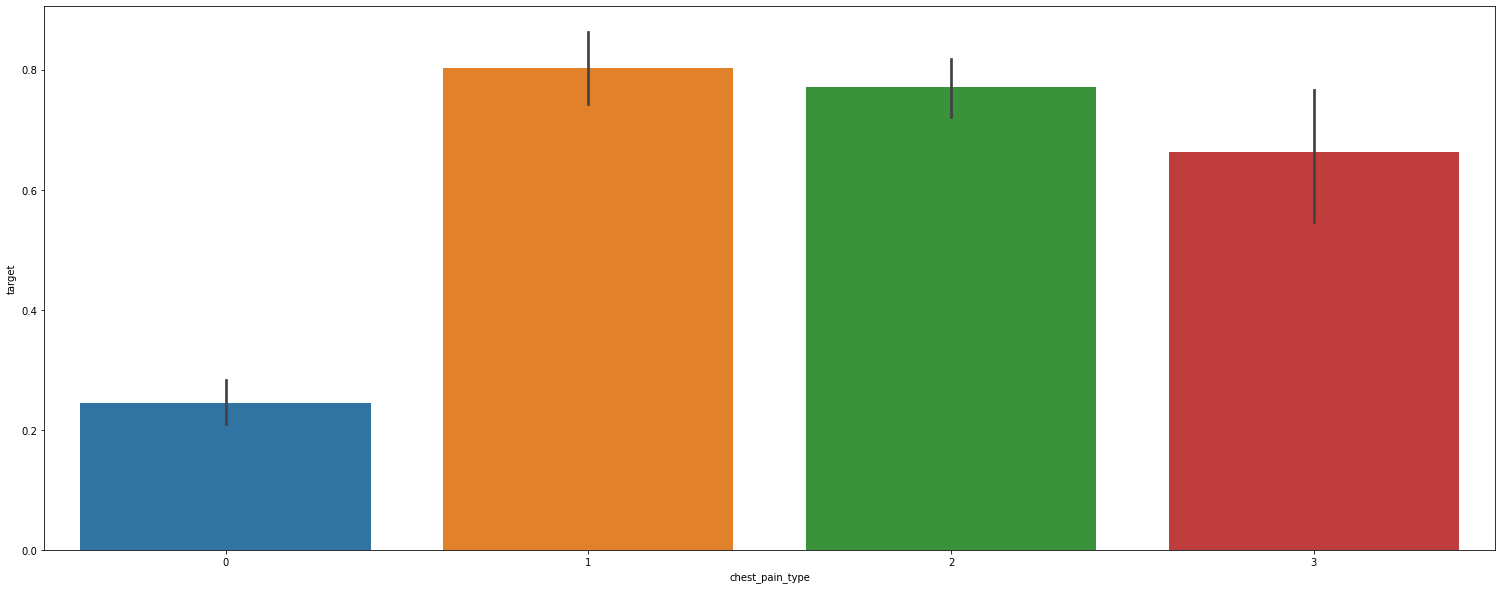

In [30]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

In [31]:
data["resting_blood_pressure"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resting_blood_pressure', ylabel='target'>

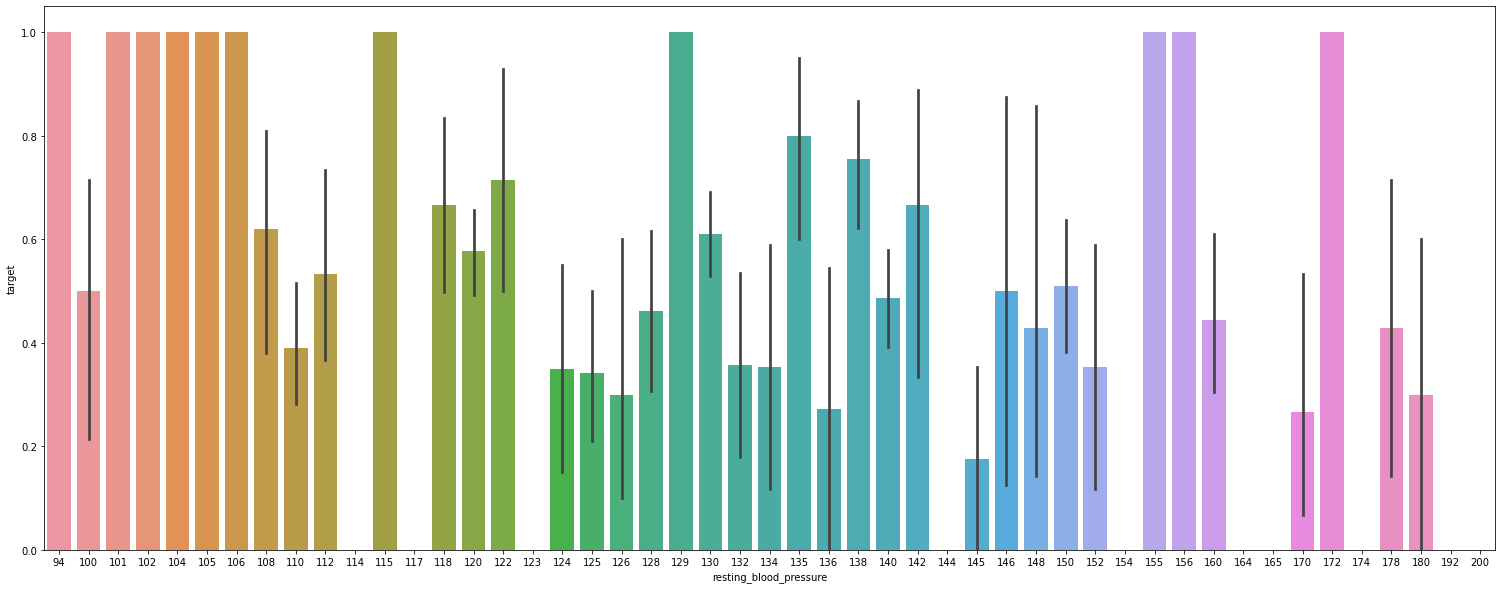

In [32]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y)

In [33]:
data["rest_ecg"].unique()

array([1, 0, 2], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rest_ecg', ylabel='target'>

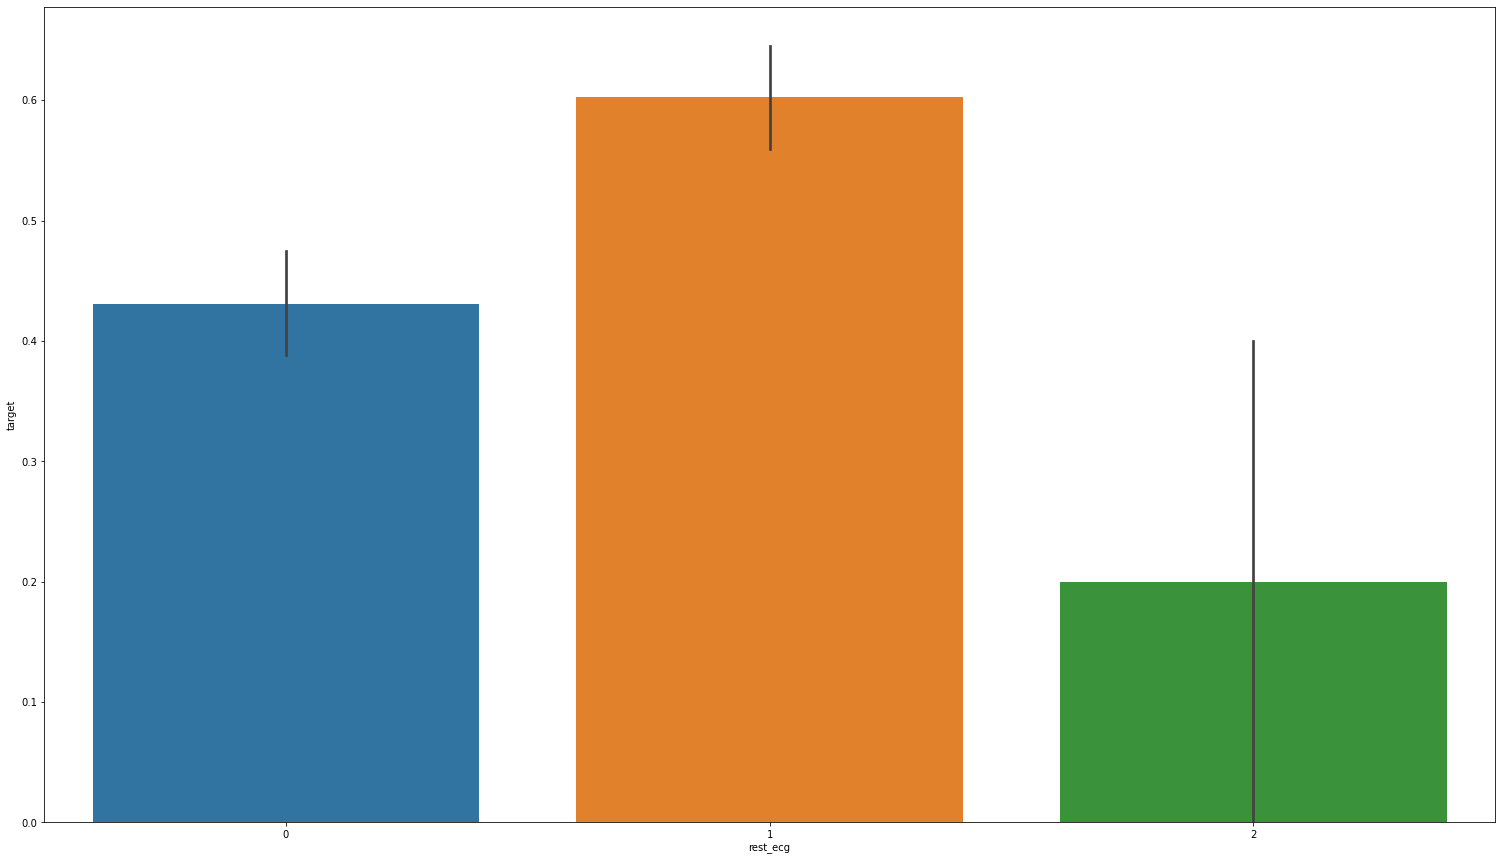

In [34]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

In [35]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exercise_induced_angina', ylabel='target'>

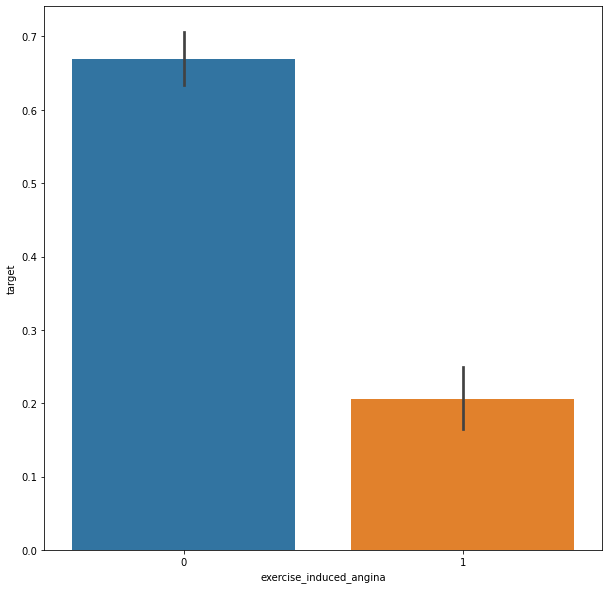

In [36]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

In [37]:
data["st_slope"].unique()

array([2, 0, 1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='st_slope', ylabel='target'>

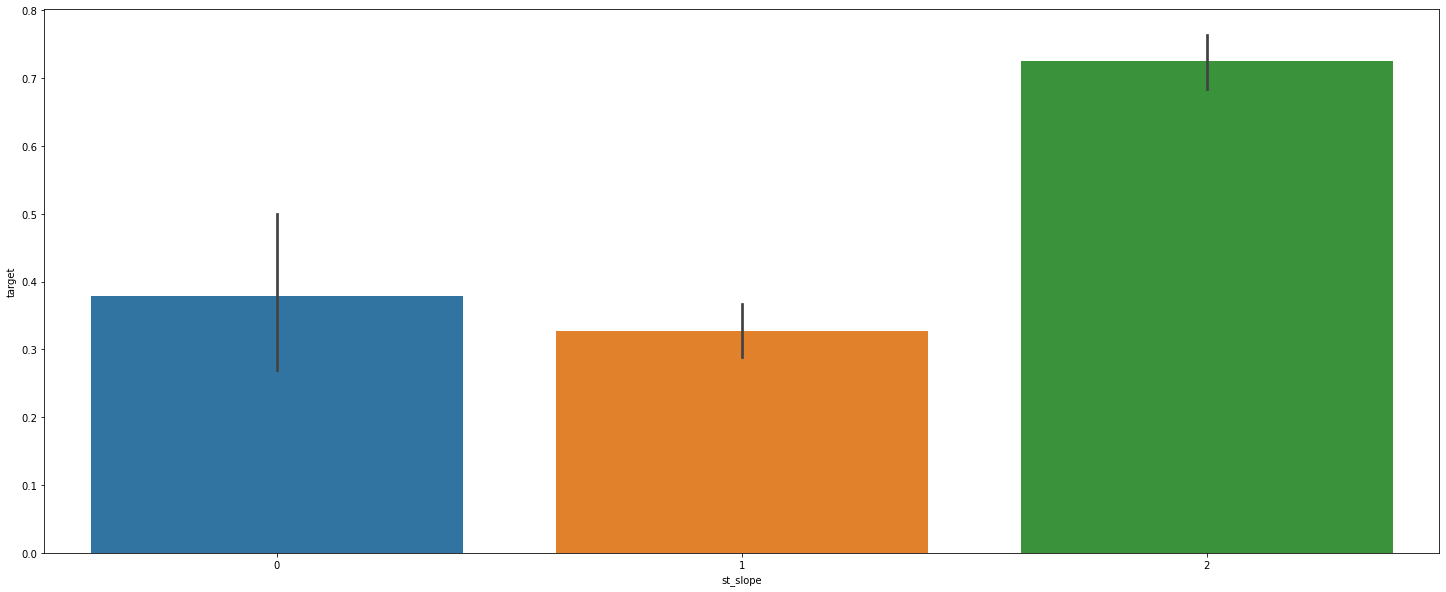

In [38]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

In [39]:
data["num_major_vessels"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

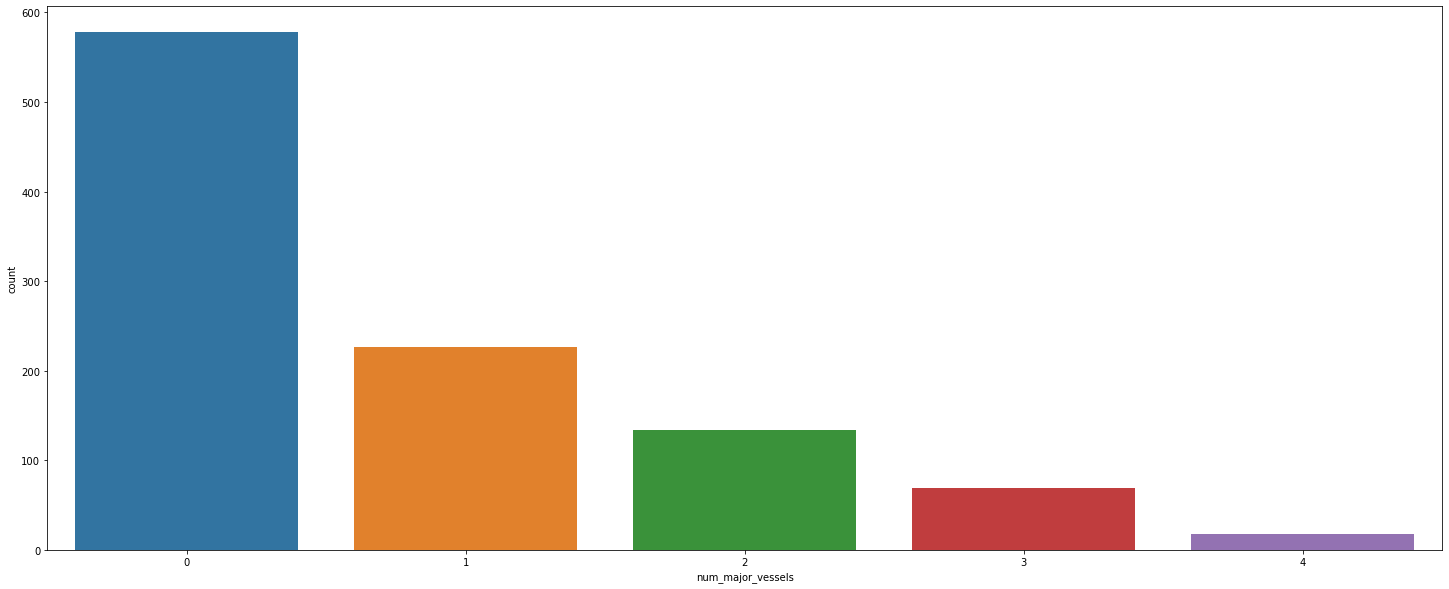

In [40]:
plt.figure(figsize=(25, 10))
sns.countplot(data["num_major_vessels"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_major_vessels', ylabel='target'>

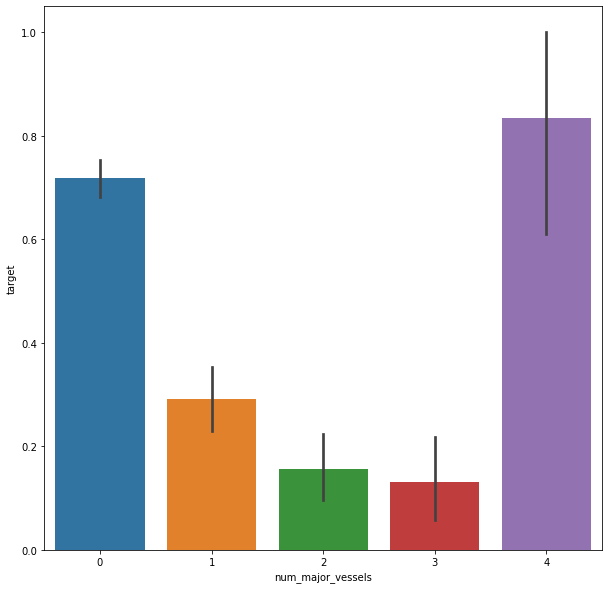

In [41]:
plt.figure(figsize=(10, 10))
sns.barplot(data["num_major_vessels"],y)

In [42]:
data["thalassemia"].unique()

array([3, 2, 1, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalassemia'>

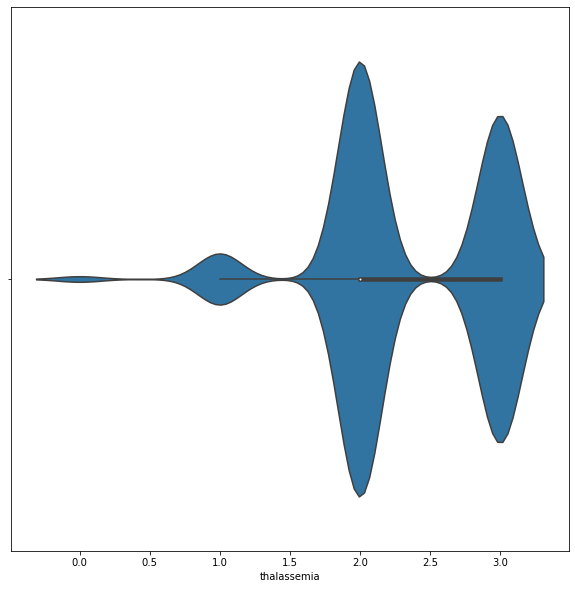

In [43]:
plt.figure(figsize=(10, 10))
sns.violinplot(data["thalassemia"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalassemia', ylabel='target'>

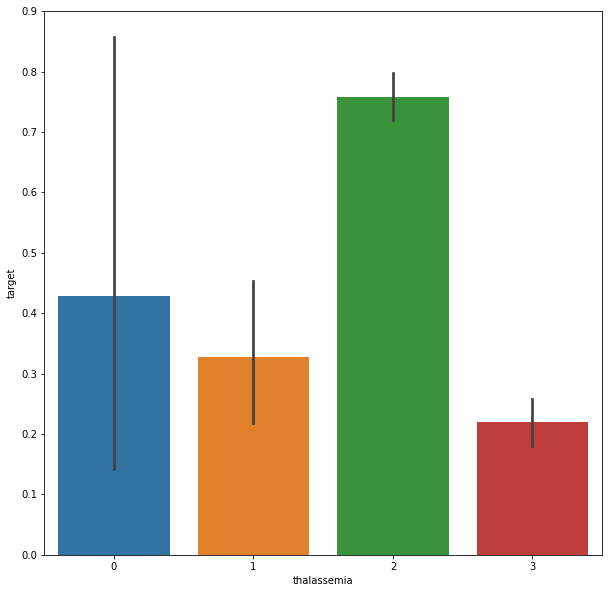

In [44]:
plt.figure(figsize=(10, 10))
sns.barplot(data["thalassemia"],y)

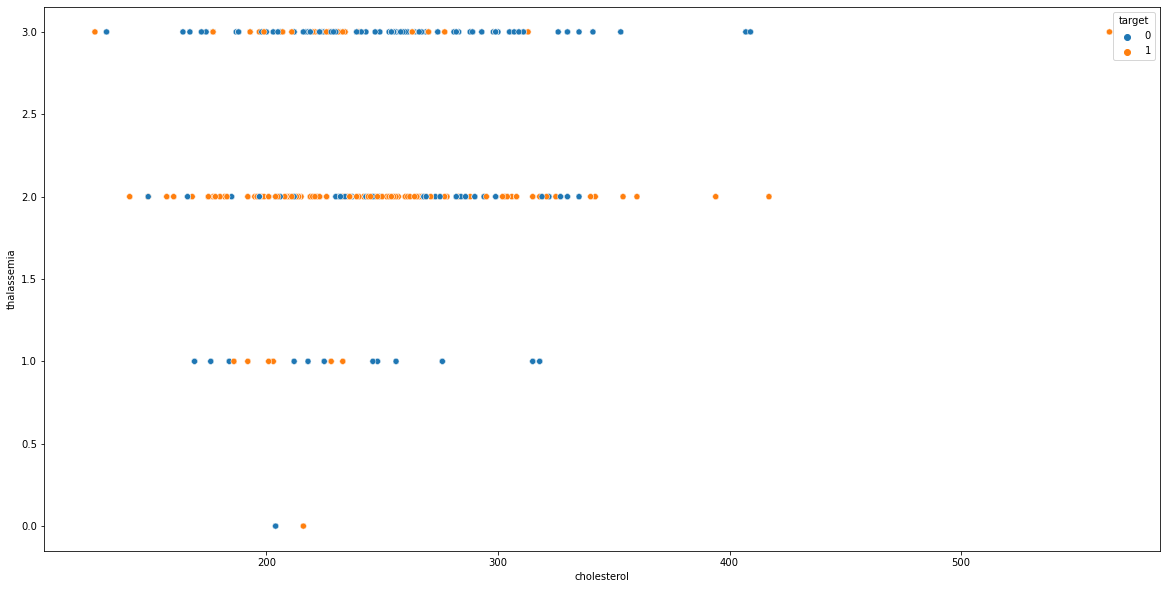

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

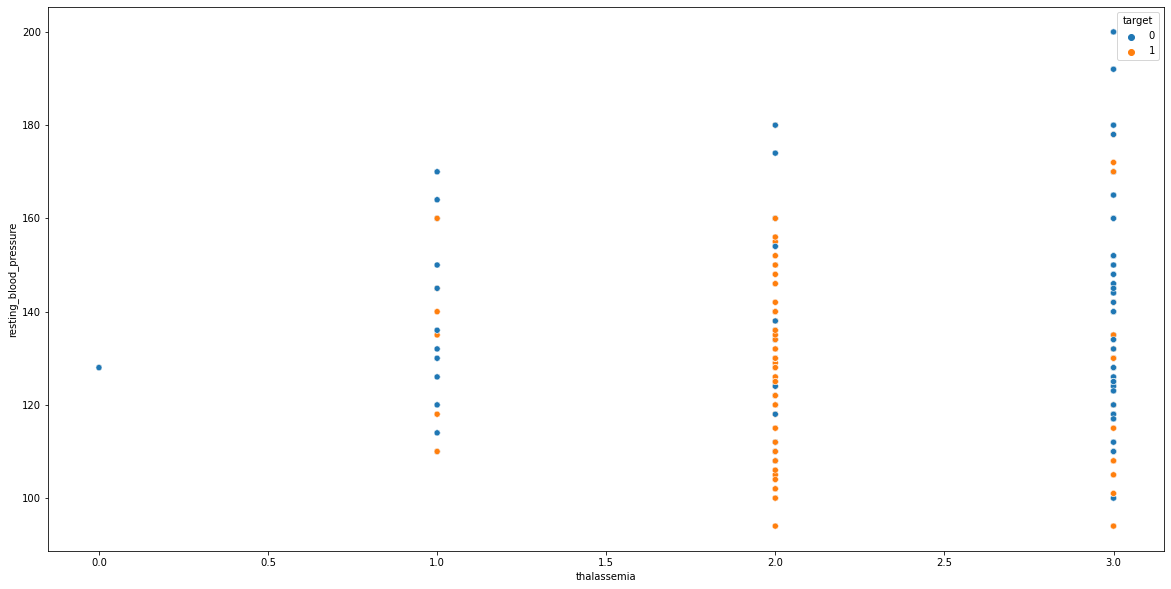

In [46]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

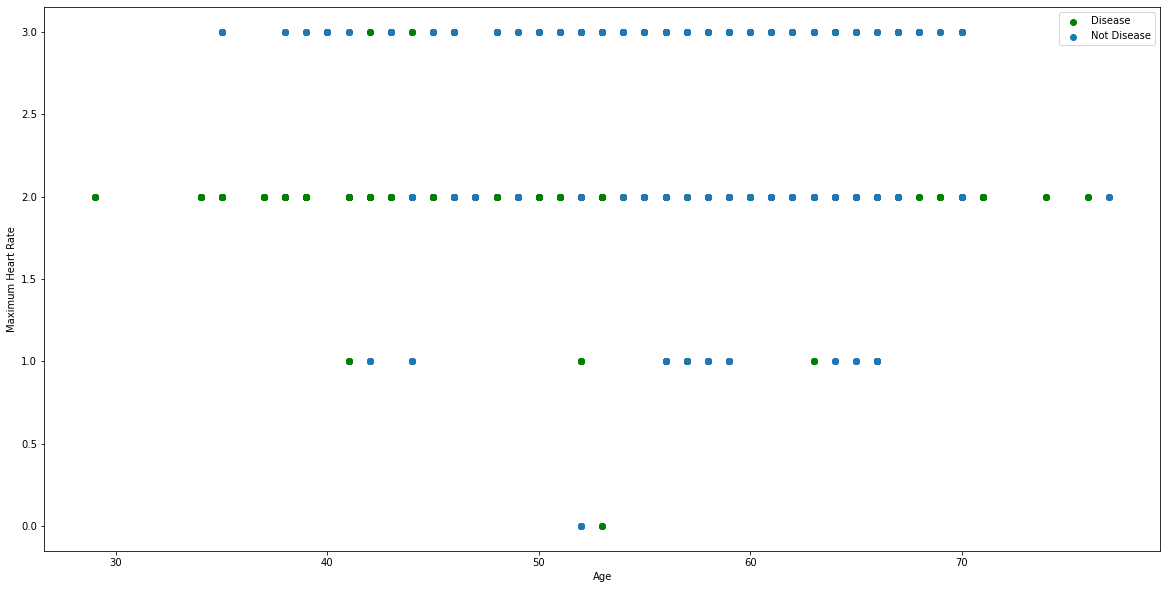

In [47]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<Figure size 1440x720 with 0 Axes>

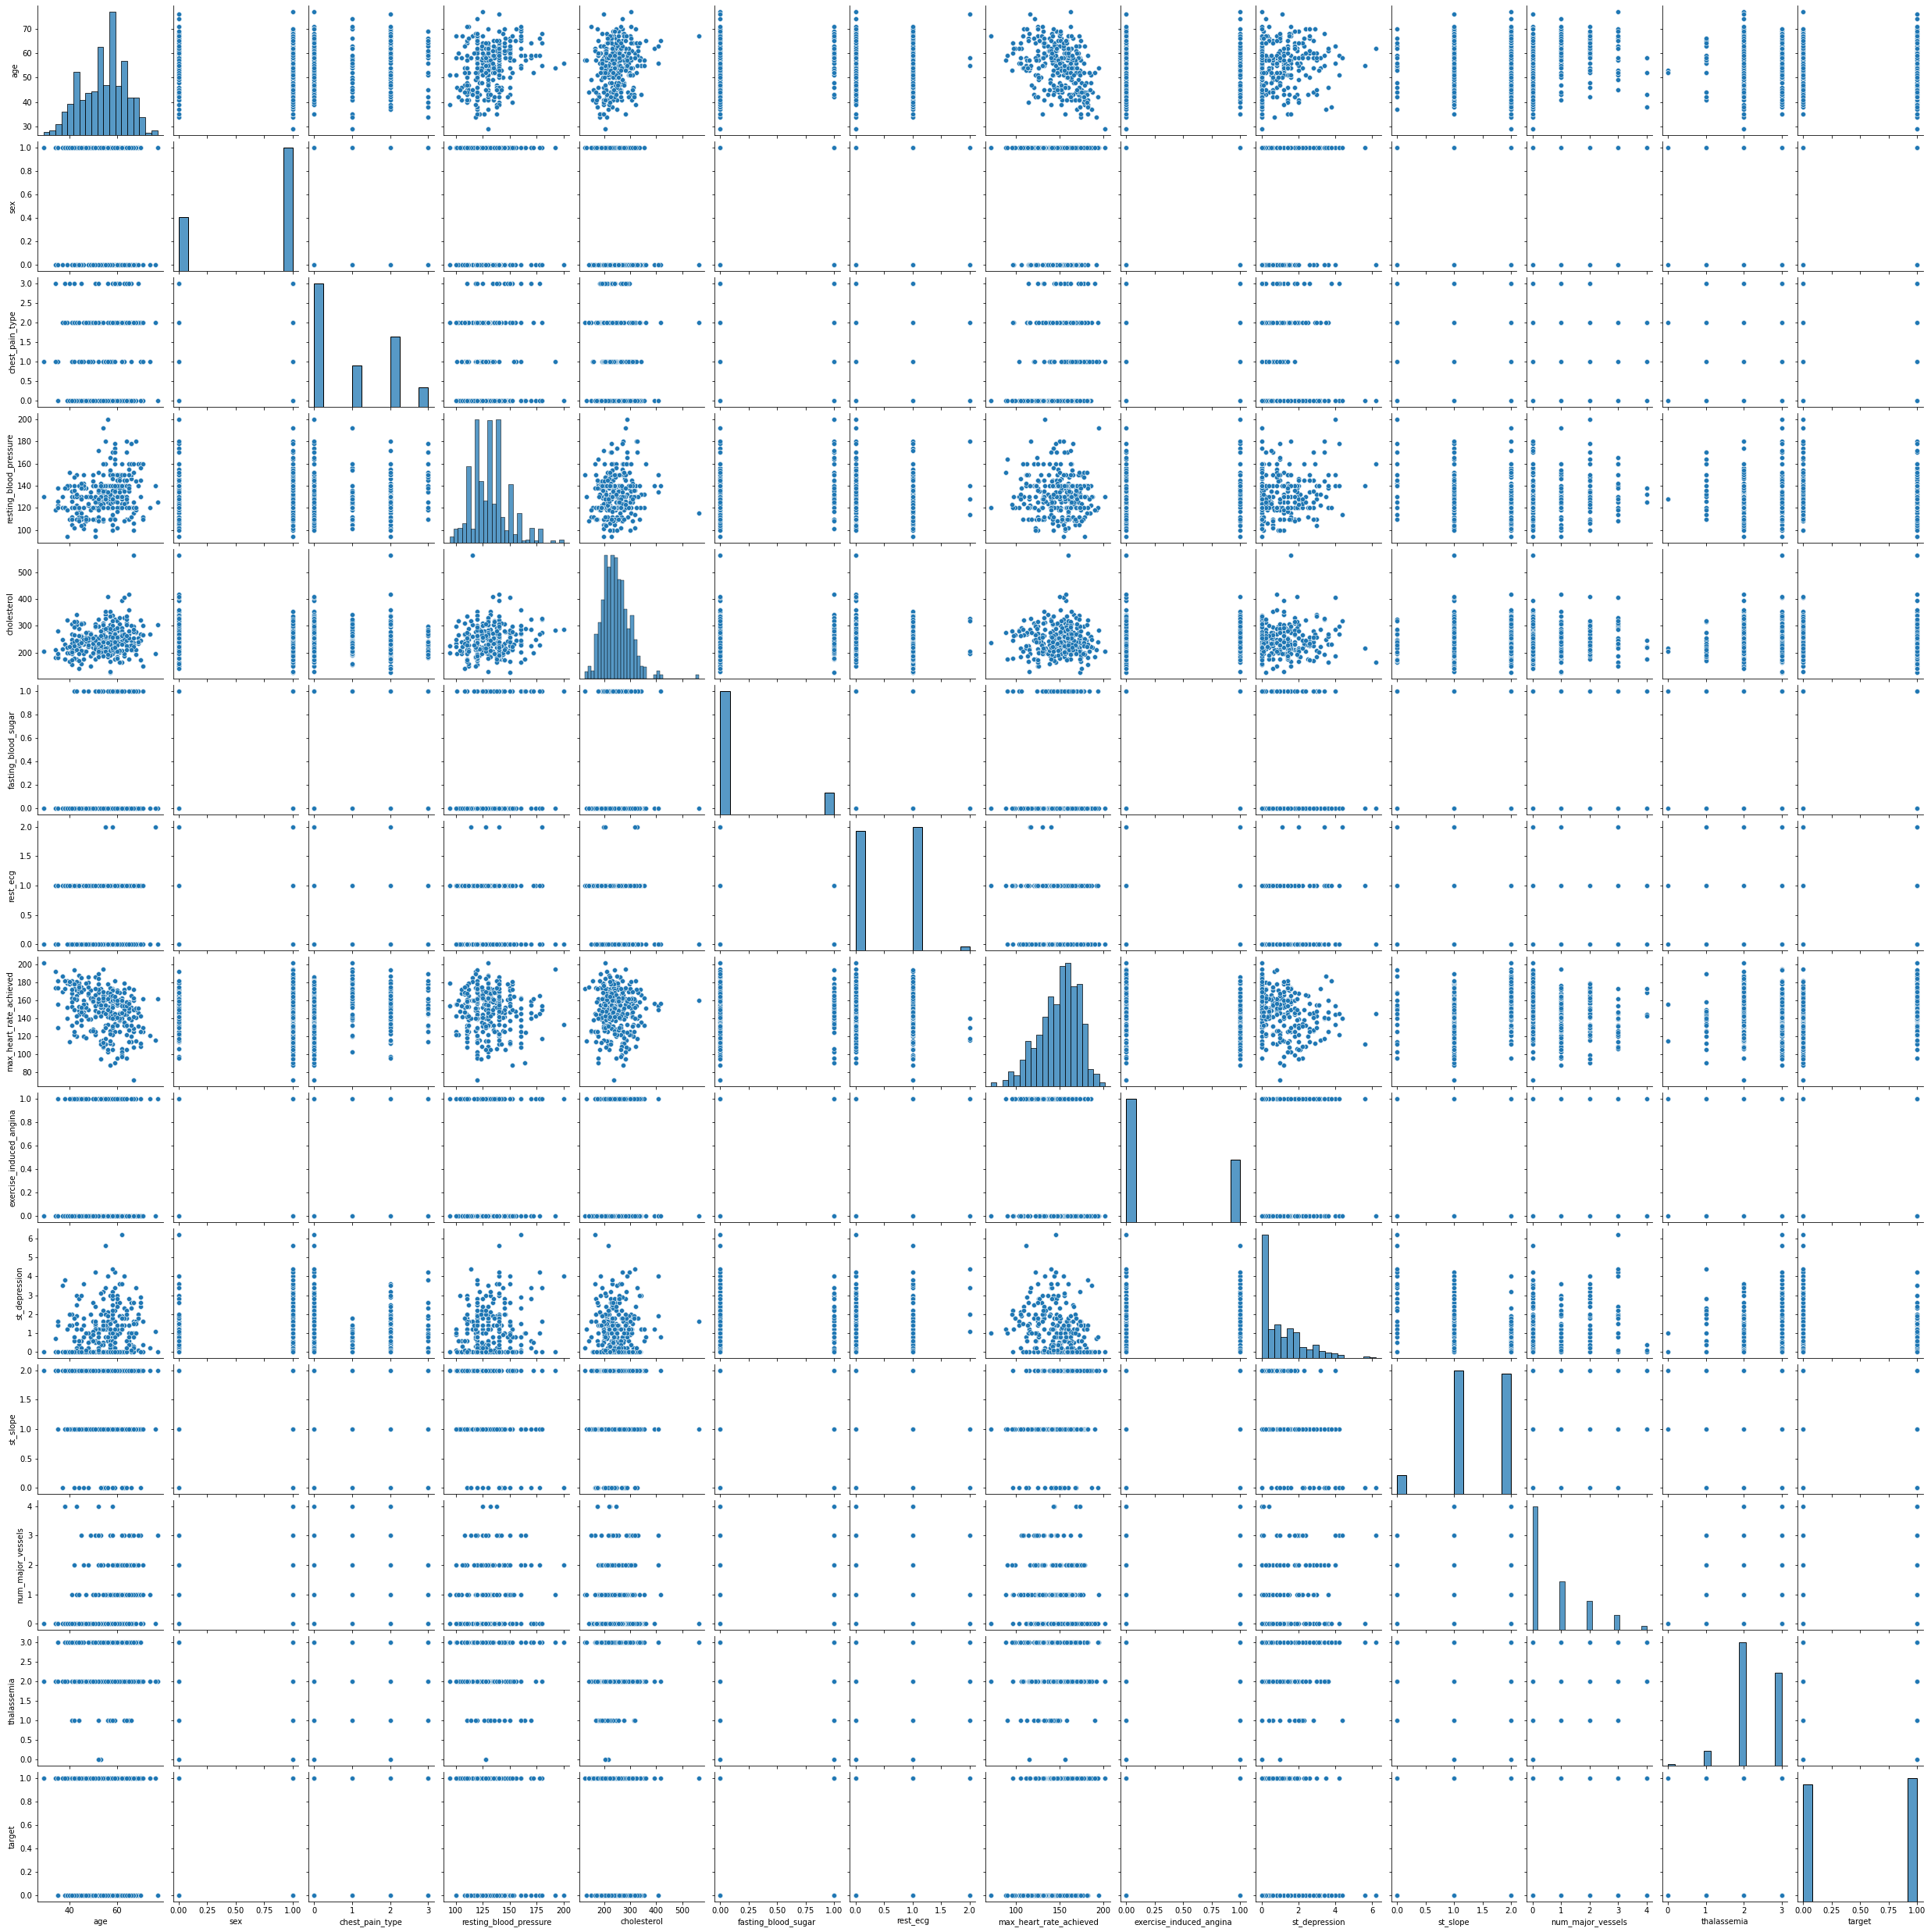

In [48]:
plt.figure(figsize=(20, 10))
sns.pairplot(data=data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>],
       [<AxesSubplot:title={'center':'exercise_induced_angina'}>,
        <AxesSubplot:title={'center':'st_depression'}>,
        <AxesSubplot:title={'center':'st_slope'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>],
       [<AxesSubplot:title={'center':'thalassemia'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

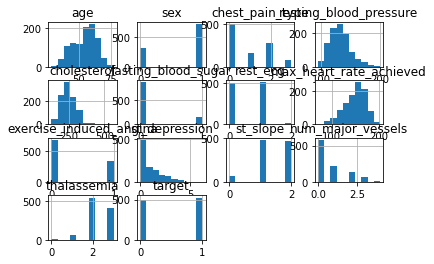

In [49]:
data.hist()

In [50]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

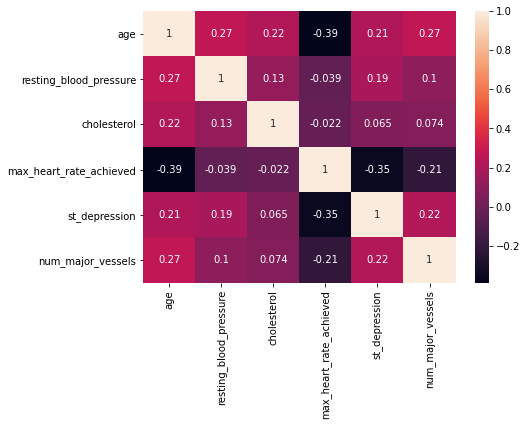

In [51]:
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True)
plt.show()

In [52]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


## splitting data for training and testing

In [53]:
y , x =data["target"] , data.drop("target" , axis=1)

In [54]:
from sklearn.feature_selection import SelectKBest , f_regression 

selector=SelectKBest(score_func=f_regression , k=9)
x_selected=selector.fit_transform(x , y)
selected_indices=np.argsort(selector.scores_)[::-1][:7]
selected_features=x.columns[selected_indices]
selected_features

Index(['st_depression', 'exercise_induced_angina', 'chest_pain_type',
       'max_heart_rate_achieved', 'num_major_vessels', 'st_slope',
       'thalassemia'],
      dtype='object')

In [55]:
x.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
predictors.drop(columns=['age', 'sex', 'thalassemia', 'st_slope', 'st_depression', 'exercise_induced_angina'] , inplace=True)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [57]:
X_train.shape

(820, 7)

In [58]:
Y_train.shape

(820,)

In [59]:
X_test.shape

(205, 7)

In [60]:
Y_test.shape

(205,)

In [61]:
from sklearn.metrics import accuracy_score

## modelling and predicting using machine learning

In [62]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [63]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


## Learning curve for training score & cross validation score

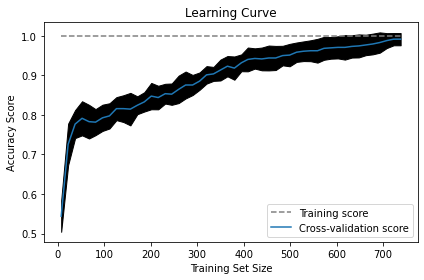

In [64]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, Y_train,cv=10,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))
# Number of folds in cross-validation=10
# Evaluation metric = accuracy
# 50 different sizes of the training set


# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--',color="grey",  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="black")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [65]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


In [66]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [67]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.863


In [68]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

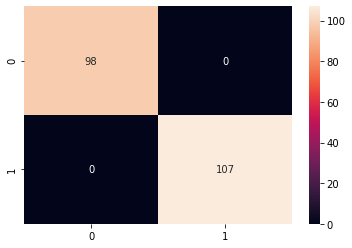

In [69]:
matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

In [70]:
from sklearn.metrics import precision_score

In [71]:
precision = precision_score(Y_test, y_pred_rf)
print("Precision: ",precision)

Precision:  1.0


In [72]:
from sklearn.metrics import recall_score

In [73]:
recall = recall_score(Y_test, y_pred_rf)
print("Recall is: ",recall)

Recall is:  1.0


In [74]:
print("F score is: ",(2*precision*recall)/(precision+recall))

F score is:  1.0


In [75]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,98,0
1,0,107


In [76]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [77]:
fnr=FN*100/(FN+TP)
fnr

0.0

In [78]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 75.24%
Test accuracy: 80.98%
[1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0]


In [79]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.98 %


In [80]:
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 75.24%
Test accuracy: 80.98%


<AxesSubplot:>

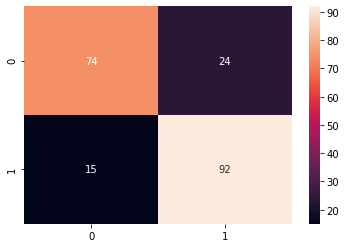

In [81]:
matrix= confusion_matrix(Y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")

In [82]:
precision = precision_score(Y_test, y_pred_nb)
print("Precision: ",precision)

Precision:  0.7931034482758621


In [83]:
recall = recall_score(Y_test, y_pred_nb)
print("Recall is: ",recall)

Recall is:  0.8598130841121495


In [84]:
print("F score is: ",(2*precision*recall)/(precision+recall))

F score is:  0.8251121076233183


In [85]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,74,24
1,15,92


In [86]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

fnr = FN*100/(FN+TP)
fnr

14.018691588785046

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 79.63%
Test accuracy: 73.66%
[1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [88]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.66 %


In [89]:
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train accuracy: 91.10%
Test accuracy: 74.15%


In [90]:
for i in range(1,11):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train accuracy: 100.00%
Test accuracy: 100.00%
n_neigbors = 2
Train accuracy: 99.27%
Test accuracy: 93.66%
n_neigbors = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train accuracy: 98.90%
Test accuracy: 89.76%
n_neigbors = 4
Train accuracy: 93.78%
Test accuracy: 79.51%
n_neigbors = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train accuracy: 91.10%
Test accuracy: 74.15%
n_neigbors = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train accuracy: 82.32%
Test accuracy: 74.63%
n_neigbors = 7
Train accuracy: 81.46%
Test accuracy: 75.61%
n_neigbors = 8
Train accuracy: 79.63%
Test accuracy: 73.66%
n_neigbors = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train accuracy: 77.32%
Test accuracy: 74.63%
n_neigbors = 10
Train accuracy: 76.95%
Test accuracy: 74.15%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

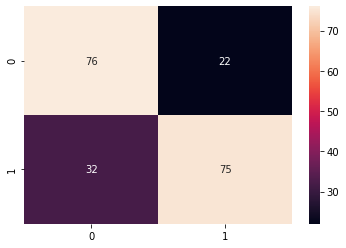

In [91]:
matrix= confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

In [92]:
precision = precision_score(Y_test, y_pred_knn)
print("Precision: ",precision)

Precision:  0.7731958762886598


In [93]:
recall = recall_score(Y_test, y_pred_knn)
print("Recall is: ",recall)

Recall is:  0.7009345794392523


In [94]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,76,22
1,32,75


In [95]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

fnr = FN*100/(FN+TP)
fnr

29.906542056074766

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0]


In [97]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 82.93 %


In [98]:
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [99]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.811
Accuracy on test set: 0.829


## Decision tree visualization

In [100]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


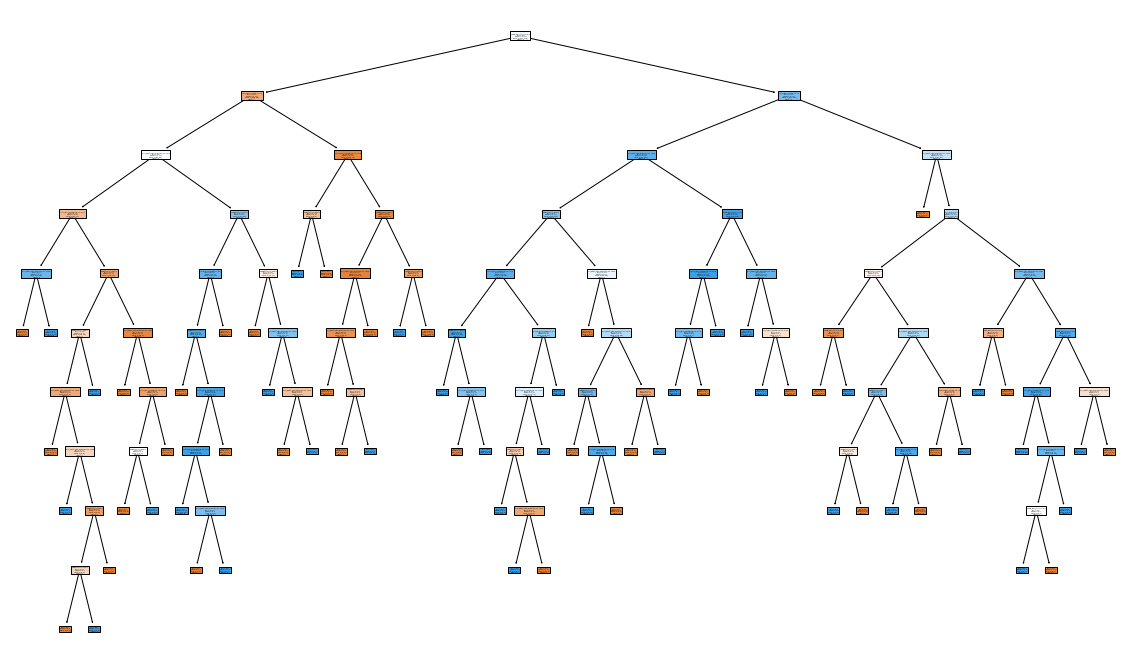

In [101]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
     
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, class_names=df.columns[7], filled=True)
plt.show()

In [102]:
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(max_depth=1, random_state=0)

In [103]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(max_depth=1, presort=False, random_state=0)

## Depth 1

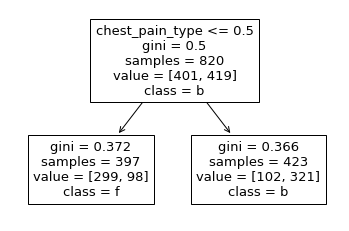

In [104]:
plot_tree(clf, feature_names=X_train.columns, class_names=df.columns[5])
plt.show()

<AxesSubplot:>

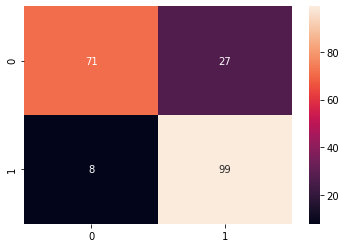

In [105]:
matrix= confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

In [106]:
precision = precision_score(Y_test, y_pred_dt)
print("Precision: ",precision)

Precision:  0.7857142857142857


In [107]:
recall = recall_score(Y_test, y_pred_dt)
print("Recall is: ",recall)

Recall is:  0.9252336448598131


In [108]:
print("F score is: ",(2*precision*recall)/(precision+recall))

F score is:  0.8497854077253219


In [109]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,71,27
1,8,99


In [110]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]


fnr = FN*100/(FN+TP)
fnr

7.4766355140186915

## Final Score

In [111]:
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [112]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.736585
Decision Trees,0.829268
Naive Bayes,0.809756
Random Forests,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

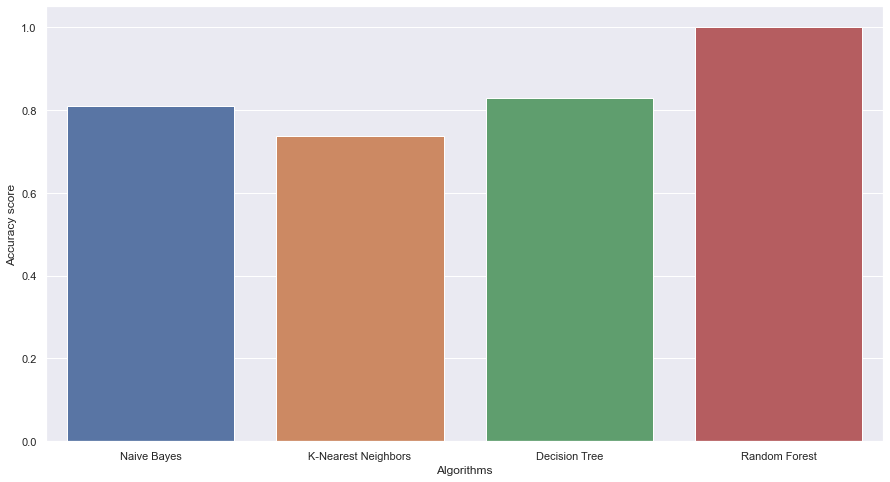

In [113]:
scores = [score_nb/100,score_knn/100,score_dt/100,score_rf/100]
algorithms = ["Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [114]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [115]:
Y_pred_svm.shape

(205,)

In [116]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+"%")

The accuracy score achieved using Linear SVM is: 82.93%


In [117]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [118]:
Y_pred_xgb.shape

(205,)

In [119]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+"%")

The accuracy score achieved using XGBoost is: 100.0%


In [120]:
from keras.models import Sequential
from keras.layers import Dense

In [121]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=7))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [128]:
model.fit(X_train,Y_train,epochs=669)

Epoch 1/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7476
Epoch 2/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7463
Epoch 3/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7744
Epoch 4/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7573
Epoch 5/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7768
Epoch 6/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7476
Epoch 7/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7256
Epoch 8/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7549
Epoch 9/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7744
Epoch 10/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7854
Epoch 11/

26/26 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7744
Epoch 84/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7634
Epoch 85/669
26/26 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.7512
Epoch 86/669
26/26 [==============================] - 0s 4ms/step - loss: 0.5018 - accuracy: 0.7720
Epoch 87/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.7720
Epoch 88/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7768
Epoch 89/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7805
Epoch 90/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4986 - accuracy: 0.7732
Epoch 91/669
26/26 [==============================] - 0s 6ms/step - loss: 0.4866 - accuracy: 0.7756
Epoch 92/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7744
Epoch 93/669


26/26 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7634
Epoch 165/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7524
Epoch 166/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7695
Epoch 167/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7707
Epoch 168/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7598
Epoch 169/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7768
Epoch 170/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.7451
Epoch 171/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7744
Epoch 172/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7793
Epoch 173/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7659
Epoc

26/26 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.7866
Epoch 246/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7793
Epoch 247/669
26/26 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.7671
Epoch 248/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7610
Epoch 249/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7683
Epoch 250/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7598
Epoch 251/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.7671
Epoch 252/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7598
Epoch 253/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7598
Epoch 254/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7756
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7756
Epoch 327/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7793
Epoch 328/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7622
Epoch 329/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7573
Epoch 330/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7817
Epoch 331/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7780
Epoch 332/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.7549
Epoch 333/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.7659
Epoch 334/669
26/26 [==============================] - 0s 4ms/step - loss: 0.5265 - accuracy: 0.7500
Epoch 335/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7671
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7671
Epoch 408/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7622
Epoch 409/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7561
Epoch 410/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7744
Epoch 411/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7768
Epoch 412/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7695
Epoch 413/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7744
Epoch 414/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7756
Epoch 415/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7659
Epoch 416/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.7732
Epoc

26/26 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.7866
Epoch 489/669
26/26 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.7549
Epoch 490/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7671
Epoch 491/669
26/26 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7683
Epoch 492/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7256
Epoch 493/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7476
Epoch 494/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7659
Epoch 495/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7720
Epoch 496/669
26/26 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.7659
Epoch 497/669
26/26 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7402
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7683
Epoch 570/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7512
Epoch 571/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7537
Epoch 572/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7524
Epoch 573/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.7659
Epoch 574/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7707
Epoch 575/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7622
Epoch 576/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7646
Epoch 577/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7646
Epoch 578/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7598
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7744
Epoch 651/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7683
Epoch 652/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7683
Epoch 653/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7756
Epoch 654/669
26/26 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7573
Epoch 655/669
26/26 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7488
Epoch 656/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7732
Epoch 657/669
26/26 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7720
Epoch 658/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7720
Epoch 659/669
26/26 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7585
Epoc

In [129]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape

7/7 [==============================] - 0s 2ms/step


(205, 1)

In [130]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [131]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 80.49 %
